# Scratchpad for *An introduction to Statistical Learning*

Book [homepage](http://www-bcf.usc.edu/~gareth/ISL/) and [downloadable pdf](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)

In [1]:
#install.packages(c("ISLR", "MASS"))

In [2]:
suppressMessages(library("sm"));
library("vioplot");
library("ISLR");
suppressMessages(library("MASS"));

## Chapter 1

### Wage dataset

In [3]:
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

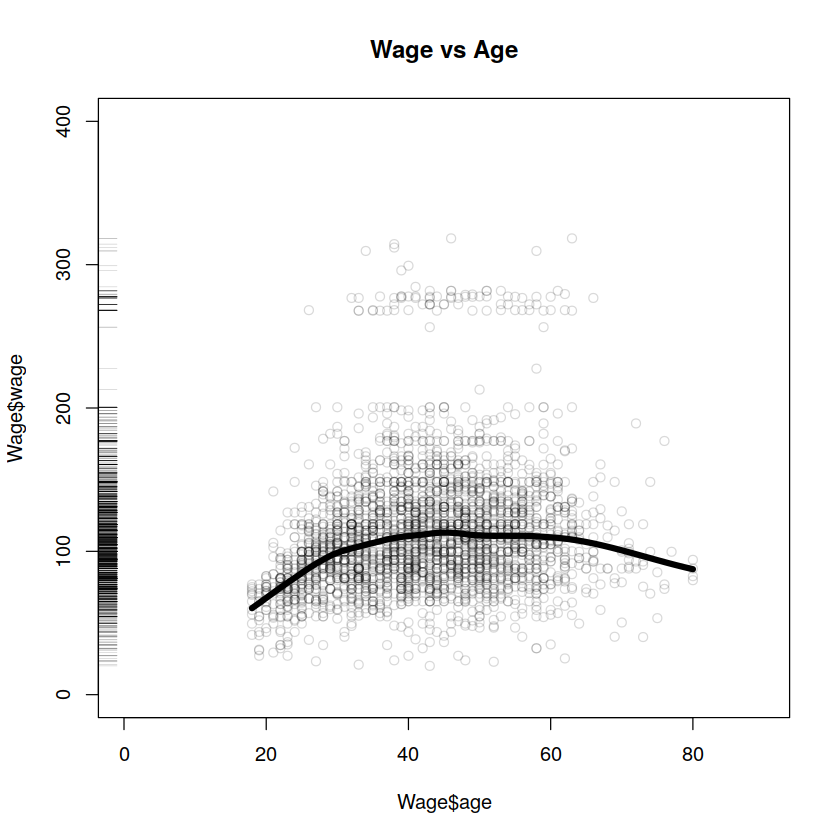

In [4]:
scatter.smooth(Wage$age, Wage$wage, span=0.3, col=rgb(0,0,0,0.15), lpars=list(lwd=5), ylim=c(0,400), xlim=c(0,90)); rug(Wage$wage,side=2, col=rgb(0,0,0,.2));
title("Wage vs Age")

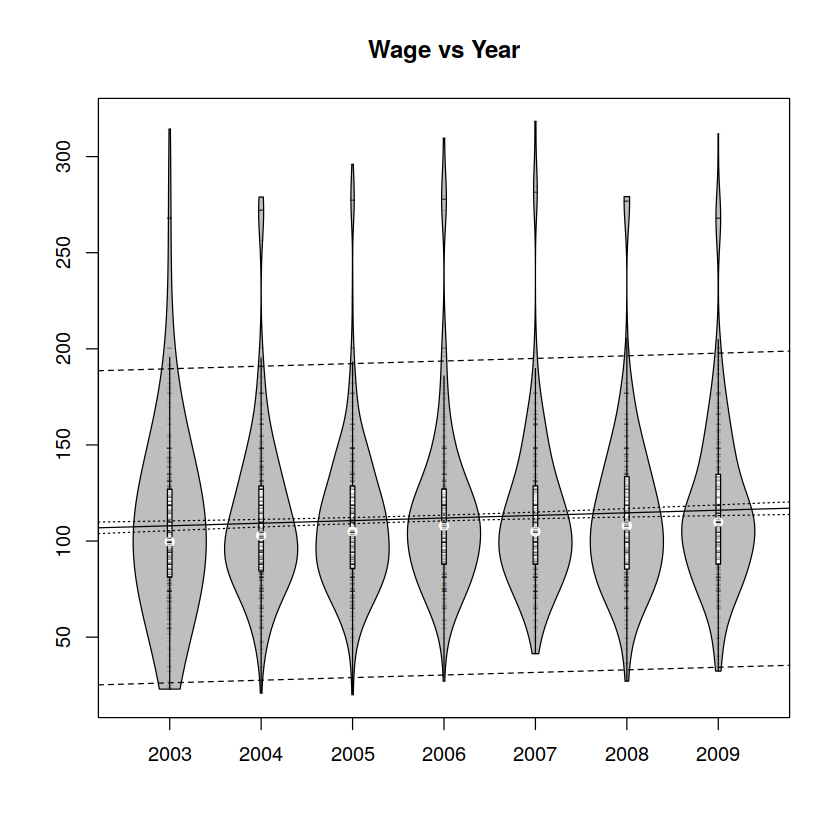

In [5]:
# violin plot
l <- by(Wage$wage, Wage$year, function(x) {x});
do.call((function (...) { vioplot(..., names=names(l), col="gray", rectCol="white") }), unname(l));
points(wage ~ as.factor(year), Wage, pch='-', col=rgb(0,0,0,0.1));
title("Wage vs Year")

# linear model with confidence interval
fyear <- as.numeric(as.factor(Wage$year)); # rescale year to match violin plot x-axis
m <- lm(wage ~ fyear, Wage);
xvals <- seq(par("usr")[1], par("usr")[2], length=100);
p <- predict(m, data.frame(fyear=xvals), interval="confidence", level=0.95);
lines(xvals,p[,"lwr"], lty="dotted");
lines(xvals,p[,"upr"], lty="dotted");
lines(xvals,p[,"fit"]);

# prediction intervals for linear model
p <- predict(m, data.frame(fyear=xvals), interval="prediction", level=0.95);
lines(xvals,p[,"lwr"], lty="dashed");
lines(xvals,p[,"upr"], lty="dashed");

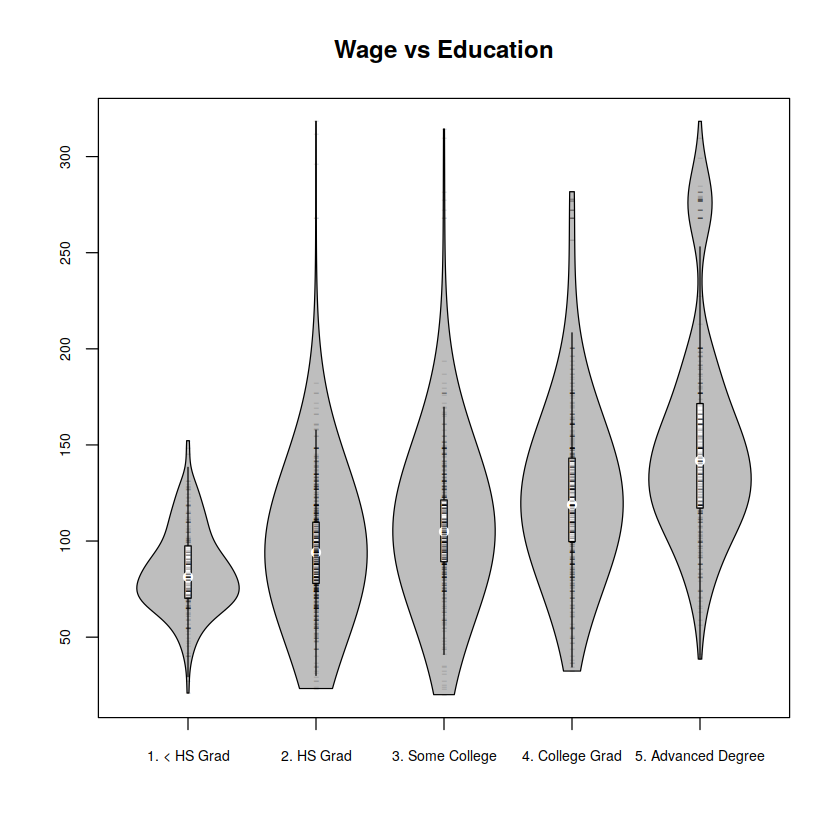

In [6]:

l = by(Wage$wage, Wage$education, function(x) {x});
par(cex.axis=0.70)
do.call((function (...) { vioplot(..., names=names(l), col="gray", rectCol="white") }), unname(l));
points(wage ~ as.factor(education), Wage, pch='-', col=rgb(0,0,0,0.1))
title("Wage vs Education")

### Smarket Dataset

In [7]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

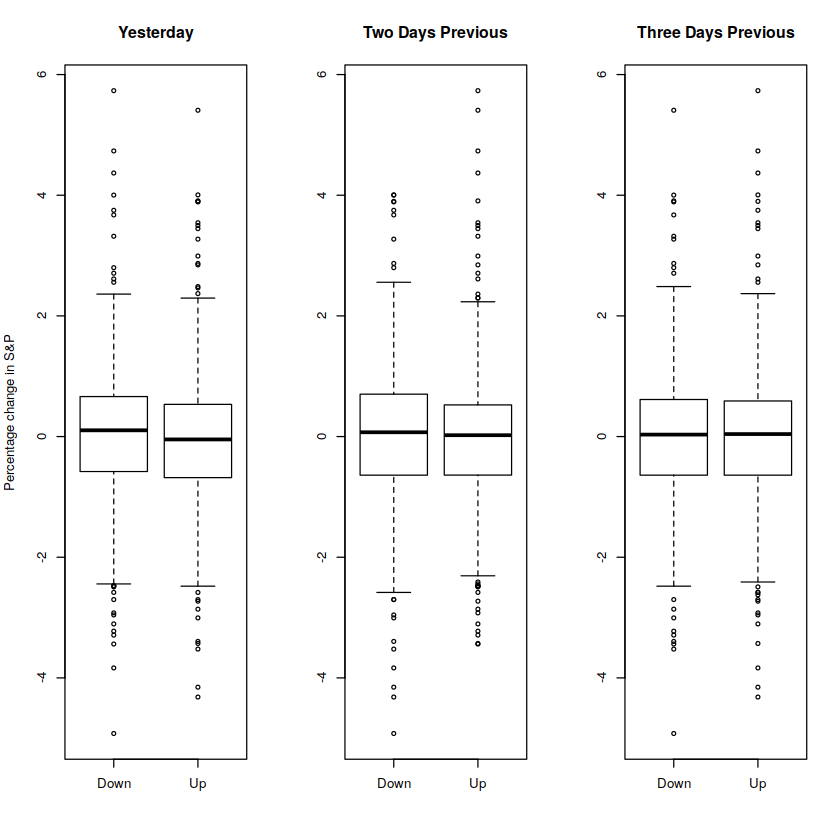

In [8]:
par(mfcol=c(1,3))
boxplot(Lag1 ~ Direction, Smarket, ylab="Percentage change in S&P"); title("Yesterday");
boxplot(Lag2 ~ Direction, Smarket); title("Two Days Previous");
boxplot(Lag3 ~ Direction, Smarket); title("Three Days Previous");

### NCI60 dataset

In [9]:
summary(NCI60)

     Length Class  Mode     
data 437120 -none- numeric  
labs     64 -none- character

In [10]:
pca<-prcomp(t(NCI60$data), scale=T, center=T)

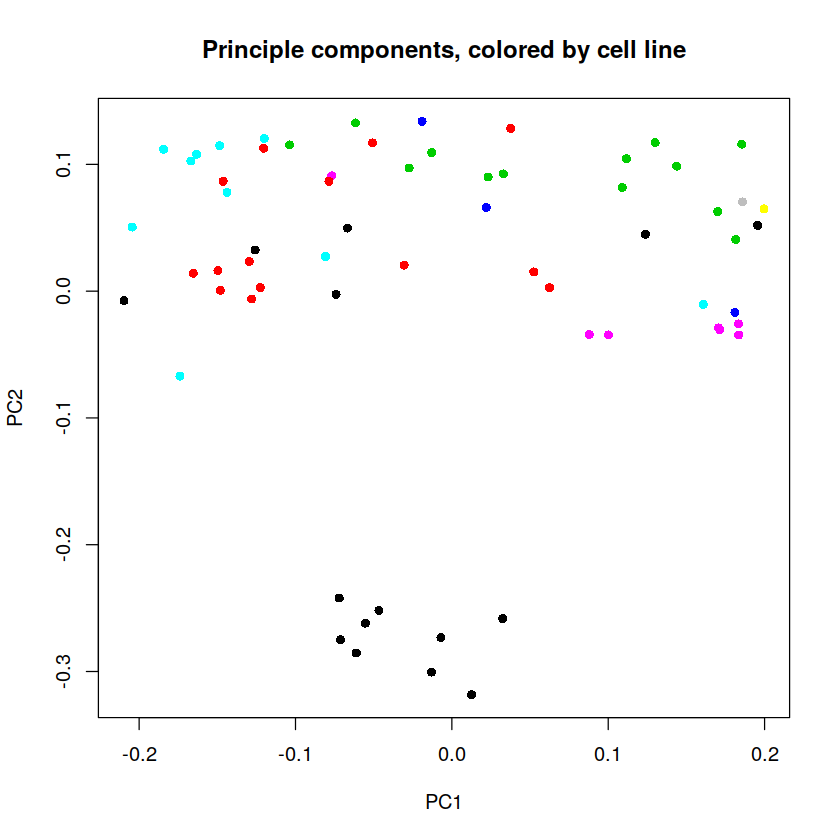

In [11]:
plot(pca$rotation[,1:2], col=as.factor(NCI60$labs), pch=16, main="Principle components, colored by cell line")

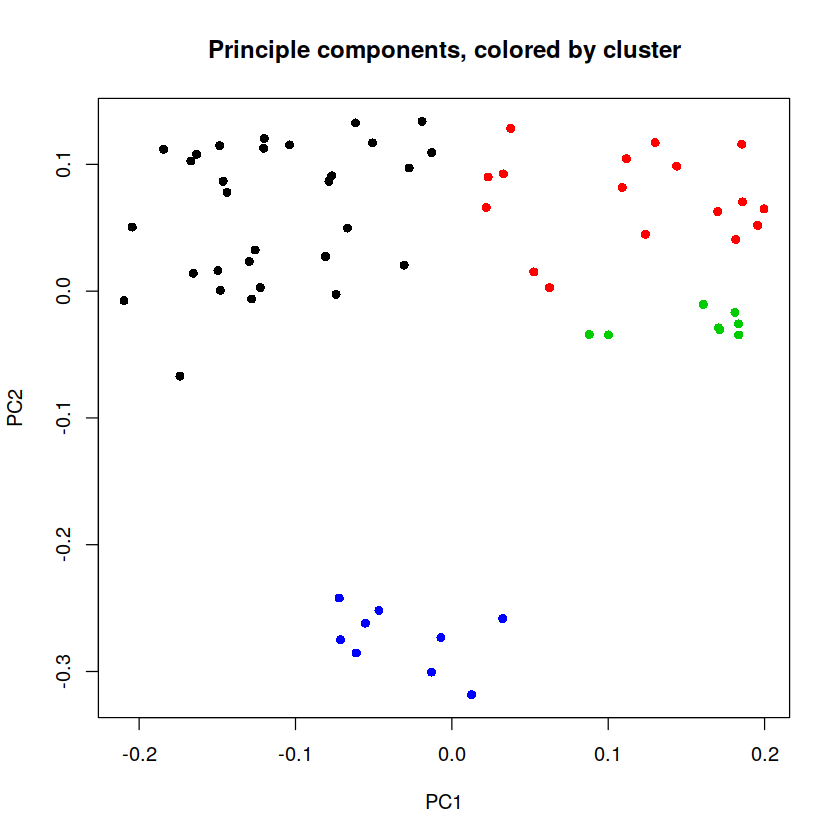

In [12]:
set.seed(20180403) # kmeans clustering uses a random number, so let's ensure reproducability
k <- kmeans(NCI60$data, 4, nstart=4)
plot(pca$rotation[,1:2], col=k$cluster, pch=16, main=("Principle components, colored by cluster"))